# Introduction to Machine Learning and AI

# Final-Project ：Thinking about Purchasing Stock  Case Study

# Group 2 : Qi Zhang && Xinmeng Liu

## Import relevant packages

In [99]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sn
import datetime
plt.style.use('ggplot')
from sklearn.impute import SimpleImputer

## Import the data set

In [100]:
FILE1 = "csv_file\Apple.csv"
FILE2 = "csv_file\Microsoft.csv"
df_apple = pd.read_csv(FILE1)
df_microsoft = pd.read_csv(FILE2)

## Data Cleansing

In [101]:
print(df_apple.isnull().any()) 
print(df_microsoft.isnull().any()) 
# No value is missing in these 2 data sets

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool
Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


### Drop 2020 data

In [102]:
df_apple = df_apple[df_apple["Date"].str.contains("2020") == False]
df_microsoft = df_microsoft[df_microsoft["Date"].str.contains("2020") == False]
# The 2020 data is not needed at all due to COVID-19 impacts.

### Turn the date into index

In [103]:
df_apple['Date'] = pd.to_datetime(df_apple.Date,format='%Y-%m-%d')
df_apple.index = df_apple['Date']

df_microsoft['Date'] = pd.to_datetime(df_microsoft.Date,format='%Y-%m-%d')
df_microsoft.index = df_microsoft['Date']

### The basic info of Apple stock

In [104]:
print(df_apple.info())
print(df_apple.describe())
print(df_apple.head())
print(df_apple.corr())
print(df_apple.columns)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10248 entries, 1980-12-12 to 2022-08-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10248 non-null  datetime64[ns]
 1   Open       10248 non-null  float64       
 2   High       10248 non-null  float64       
 3   Low        10248 non-null  float64       
 4   Close      10248 non-null  float64       
 5   Adj Close  10248 non-null  float64       
 6   Volume     10248 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 640.5 KB
None
               Open          High           Low         Close     Adj Close  \
count  10248.000000  10248.000000  10248.000000  10248.000000  10248.000000   
mean      13.199479     13.339672     13.061867     13.206506     12.570622   
std       30.388313     30.738308     30.062666     30.418153     30.107344   
min        0.049665      0.049665      0.049107      0.04910

### The basic info of Microsoft stock

In [105]:
print(df_microsoft.info())
print(df_microsoft.describe())
print(df_microsoft.head())
print(df_microsoft.corr())
print(df_microsoft.columns)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8922 entries, 1986-03-13 to 2022-08-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8922 non-null   datetime64[ns]
 1   Open       8922 non-null   float64       
 2   High       8922 non-null   float64       
 3   Low        8922 non-null   float64       
 4   Close      8922 non-null   float64       
 5   Adj Close  8922 non-null   float64       
 6   Volume     8922 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 557.6 KB
None
              Open         High          Low        Close    Adj Close  \
count  8922.000000  8922.000000  8922.000000  8922.000000  8922.000000   
mean     39.405219    39.813412    38.982464    39.412798    34.235384   
std      59.241808    59.807334    58.622170    59.252423    59.453134   
min       0.088542     0.092014     0.088542     0.090278     0.056745   
25%    

### check the correlations through heatmap 

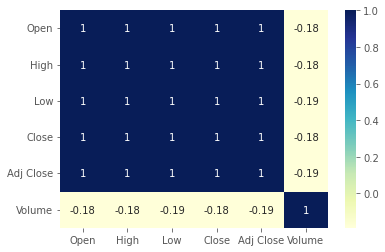

In [106]:
dataplot=sn.heatmap(df_apple.corr(),cmap='YlGnBu',annot=True)

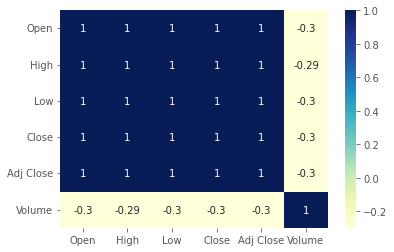

In [107]:
dataplot=sn.heatmap(df_microsoft.corr(),cmap='YlGnBu',annot=True)

# Analysis

## Check the trend by close price

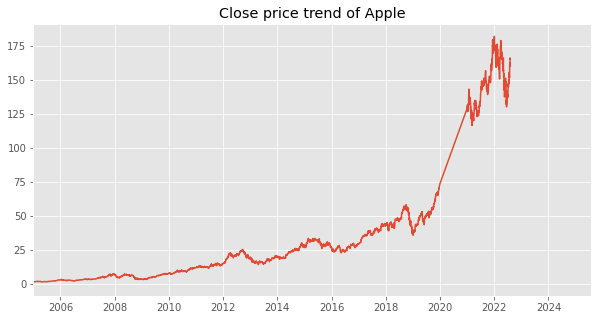

In [146]:
plt.figure(figsize=(10,5))
plt.title('Close price trend of Apple')
plt.grid(True)
dstart = datetime.datetime(2005,1,1)
dstop = datetime.datetime(2025,8,1)
plt.xlim(dstart,dstop)
plt.plot(df_apple['Close'], label='Close Price history')

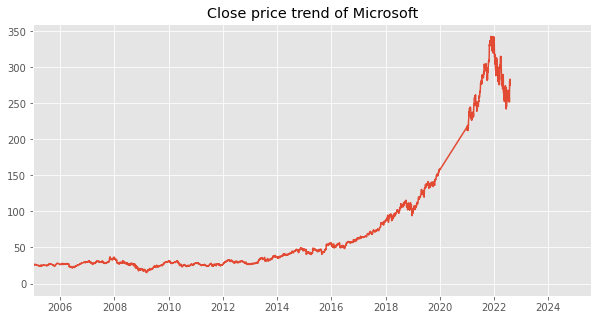

In [145]:
plt.figure(figsize=(10,5))
plt.title('Close price trend of Microsoft')
plt.grid(True)
dstart = datetime.datetime(2005,1,1)
dstop = datetime.datetime(2025,8,1)
plt.xlim(dstart,dstop)
plt.plot(df_microsoft['Close'], label='Close Price history')

## Check the trend by MA of adjusted price

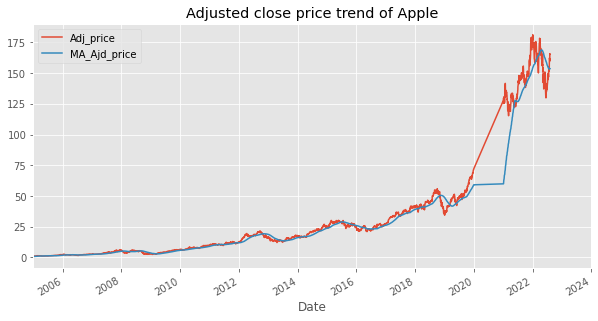

In [160]:
adj_price = df_apple['Adj Close']

plt.figure(figsize=(10,5))
plt.title('Adjusted close price trend of Apple')
plt.grid(True)
MA_adj_price = adj_price.rolling(window=100).mean()
dstart = datetime.datetime(2005,1,1)
dstop = datetime.datetime(2024,1,1)
plt.xlim(dstart,dstop)
adj_price.plot(label='Adj_price')
MA_adj_price.plot(label='MA_Ajd_price')
plt.legend()
plt.savefig(r'C:\Users\Marsy\Desktop\1.png',dpi=300, bbox_inches='tight')

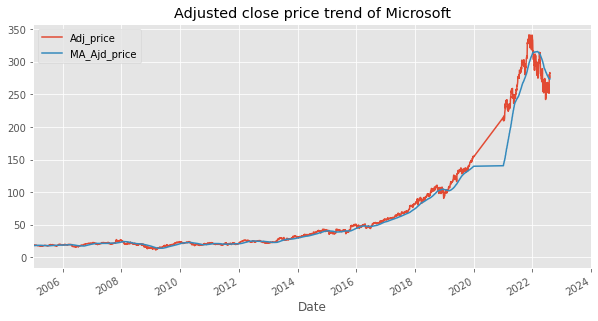

In [159]:
adj_price = df_microsoft['Adj Close']

plt.figure(figsize=(10,5))
plt.title('Adjusted close price trend of Microsoft')
plt.grid(True)
MA_adj_price = adj_price.rolling(window=100).mean()
dstart = datetime.datetime(2005,1,1)
dstop = datetime.datetime(2024,1,1)
plt.xlim(dstart,dstop)
adj_price.plot(label='Adj_price')
MA_adj_price.plot(label='MA_Ajd_price')
plt.legend()
plt.savefig(r'C:\Users\Marsy\Desktop\2.png',dpi=300, bbox_inches='tight')

## Profit analysis

In [95]:
# copy the original data 
df_apple_profit = df_apple.copy()
df_microsoft_profit = df_microsoft.copy()

# get the difference of open price and close price 
df_apple_profit['profitable'] = df_apple['Open'] - df_apple['Close']
df_microsoft_profit['profitable'] = df_microsoft['Open'] - df_microsoft['Close']

# drop the open price and close  
df_apple_profit = df_apple_profit.drop(columns=['Open','Close'])
df_microsoft_profit = df_microsoft_profit.drop(columns=['Open','Close'])

# use 1/0 to show today is profitable or not 
# So that we can apply the classification model
df_apple_profit.loc[df_apple_profit['profitable']>0,'profitable']=1
df_microsoft_profit.loc[df_microsoft_profit['profitable']>0,'profitable']=1
df_apple_profit.loc[df_apple_profit['profitable']<=0,'profitable']=0
df_microsoft_profit.loc[df_microsoft_profit['profitable']<=0,'profitable']=0

In [96]:
df_apple_profit

,Date,High,Low,Adj Close,Volume,profitable
Date,,,,,,
1980-12-12,1980-12-12,0.128906,0.128348,0.100039,469033600,0.0
1980-12-15,1980-12-15,0.122210,0.121652,0.094820,175884800,1.0
1980-12-16,1980-12-16,0.113281,0.112723,0.087861,105728000,1.0
1980-12-17,1980-12-17,0.116071,0.115513,0.090035,86441600,0.0
1980-12-18,1980-12-18,0.119420,0.118862,0.092646,73449600,0.0
...,...,...,...,...,...,...
2022-08-01,2022-08-01,163.589996,160.889999,161.285965,67829400,0.0
2022-08-02,2022-08-02,162.410004,159.630005,159.788040,59907000,1.0
2022-08-03,2022-08-03,166.589996,160.750000,165.899567,82507500,0.0


In [97]:
df_microsoft_profit

,Date,High,Low,Adj Close,Volume,profitable
Date,,,,,,
1986-03-13,1986-03-13,0.101563,0.088542,0.061109,1031788800,0.0
1986-03-14,1986-03-14,0.102431,0.097222,0.063292,308160000,0.0
1986-03-17,1986-03-17,0.103299,0.100694,0.064384,133171200,0.0
1986-03-18,1986-03-18,0.103299,0.098958,0.062746,67766400,1.0
1986-03-19,1986-03-19,0.100694,0.097222,0.061655,47894400,1.0
...,...,...,...,...,...,...
2022-08-01,2022-08-01,281.279999,275.839996,278.010010,21539600,0.0
2022-08-02,2022-08-02,277.890015,272.380005,274.820007,22754200,1.0
2022-08-03,2022-08-03,283.500000,276.609985,282.470001,23518900,0.0
